x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 338us/step - loss: 0.8418 - acc: 0.7724 - val_loss: 0.2442 - val_acc: 0.9274
Epoch 2/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.2056 - acc: 0.9383 - val_loss: 0.1633 - val_acc: 0.9549
Epoch 3/12
60000/60000 [==============================] - 20s 330us/step - loss: 0.1581 - acc: 0.9522 - val_loss: 0.1252 - val_acc: 0.9623
Epoch 4/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.1315 - acc: 0.9604 - val_loss: 0.1085 - val_acc: 0.9679
Epoch 5/12
60000/60000 [==============================] - 20s 330us/step - loss: 0.1150 - acc: 0.9649 - val_loss: 0.0948 - val_acc: 0.9723
Epoch 6/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.1016 - acc: 0.9691 - val_loss: 0.0853 - val_acc: 0.9746
Epoch 7/12
60000/60000 [===================

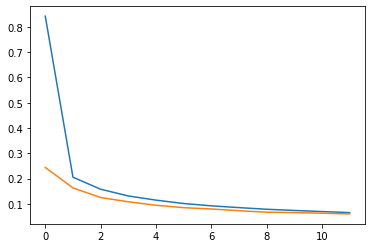

In [4]:
#baselinecode

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])
#saved the model in hist
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
fig=plt.figure()

ax=plt.subplot(111)

ax.plot((hist.history['loss']),label='Training Loss') #plotting training loss from hist

ax.plot((hist.history['val_loss']),label='Testing Loss')  #plotting testing loss from hist


print('Test loss:', score[0])
print('Test accuracy:', score[1])


Changing Kernel Size to 5X5


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.8474 - acc: 0.7436 - val_loss: 0.2471 - val_acc: 0.9273
Epoch 2/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.2267 - acc: 0.9324 - val_loss: 0.1816 - val_acc: 0.9454
Epoch 3/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.1742 - acc: 0.9479 - val_loss: 0.1515 - val_acc: 0.9531
Epoch 4/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.1478 - acc: 0.9555 - val_loss: 0.1248 - val_acc: 0.9620
Epoch 5/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.1296 - acc: 0.9605 - val_loss: 0.1159 - val_acc: 0.9638
Epoch 6/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.1162 - acc: 0.9641 - val_loss: 0.1014 - val_acc: 0.9678
Epoch 7/12
60000/60000 [===================

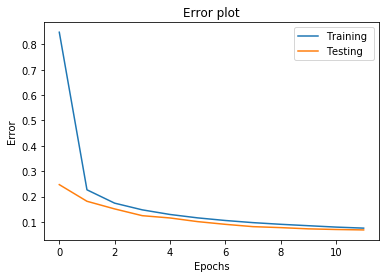

Test loss: 0.06875620720013977
Test accuracy: 0.978


In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#chnaged the kernel size to 5x5 in both the layers
model.add(Conv2D(6, kernel_size=(5, 5),   
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])
#saved the model in hist
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
fig=plt.figure()

ax=plt.subplot(111)

ax.plot((hist.history['loss']),label='Training ') #plotting training loss from hist

ax.plot((hist.history['val_loss']),label='Testing ') #plotting testing loss from hist
plt.xlabel('Epochs')
plt.ylabel('Error')


plt.title('Error plot')
ax.legend()
plt.show()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


CHANGING FEATURE MAPS AND BASIC KERNEL 3X3


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 28s 464us/step - loss: 0.7429 - acc: 0.7691 - val_loss: 0.2357 - val_acc: 0.9263
Epoch 2/12
60000/60000 [==============================] - 25s 425us/step - loss: 0.1980 - acc: 0.9394 - val_loss: 0.1524 - val_acc: 0.9557
Epoch 3/12
60000/60000 [==============================] - 25s 413us/step - loss: 0.1429 - acc: 0.9569 - val_loss: 0.1149 - val_acc: 0.9664
Epoch 4/12
60000/60000 [==============================] - 25s 423us/step - loss: 0.1144 - acc: 0.9657 - val_loss: 0.0951 - val_acc: 0.9712
Epoch 5/12
60000/60000 [==============================] - 25s 424us/step - loss: 0.0970 - acc: 0.9707 - val_loss: 0.0758 - val_acc: 0.9773
Epoch 6/12
60000/60000 [==============================] - 25s 422us/step - loss: 0.0857 - acc: 0.9744 - val_loss: 0.0726 - val_acc: 0.9763
Epoch 7/12
60000/60000 [===================

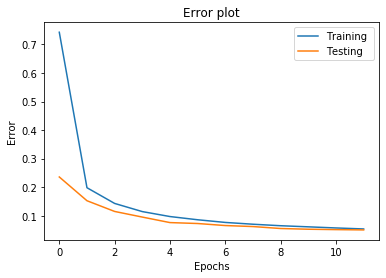

Test loss: 0.05015322856041603
Test accuracy: 0.9828


In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#chaging the feature maps to 16 in first layer and 32 in second layer
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
fig=plt.figure()

ax=plt.subplot(111)

ax.plot((hist.history['loss']),label='Training ') #plotting training loss from hist

ax.plot((hist.history['val_loss']),label='Testing ')  #plotting testing loss from hist
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error plot')
ax.legend()
plt.show()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


CHANGING KERNEL SIZE AND feature maps

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 33s 550us/step - loss: 0.6685 - acc: 0.7970 - val_loss: 0.2080 - val_acc: 0.9377
Epoch 2/12
60000/60000 [==============================] - 31s 521us/step - loss: 0.1727 - acc: 0.9482 - val_loss: 0.1382 - val_acc: 0.9594
Epoch 3/12
60000/60000 [==============================] - 31s 522us/step - loss: 0.1250 - acc: 0.9629 - val_loss: 0.1047 - val_acc: 0.9685
Epoch 4/12
60000/60000 [==============================] - 31s 523us/step - loss: 0.1010 - acc: 0.9695 - val_loss: 0.0871 - val_acc: 0.9722
Epoch 5/12
60000/60000 [==============================] - 31s 520us/step - loss: 0.0867 - acc: 0.9748 - val_loss: 0.0705 - val_acc: 0.9788
Epoch 6/12
60000/60000 [==============================] - 31s 521us/step - loss: 0.0760 - acc: 0.9776 - val_loss: 0.0620 - val_acc: 0.9812
Epoch 7/12
60000/60000 [===================

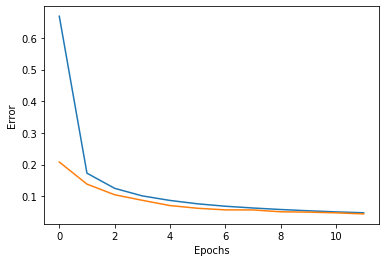

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#changing feature maps to 16 in 1st and 32 in second and changing the kernel size to 5x5 in both
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])
#saved the model in hist
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
fig=plt.figure()

ax=plt.subplot(111)

ax.plot((hist.history['loss']),label='Training ') #plotting training loss from hist

ax.plot((hist.history['val_loss']),label='Testing ')  #plotting testing loss from hist
plt.xlabel('Epochs')
plt.ylabel('Error')

print('Test loss:', score[0])
print('Test accuracy:', score[1])
